**TSF GRIP INTERNSHIP**

**DATA SCIENCE TASK 2**

**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
s_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Find Statistical Detail**

In [7]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data Visualization**

In [ ]:
from scipy import stats

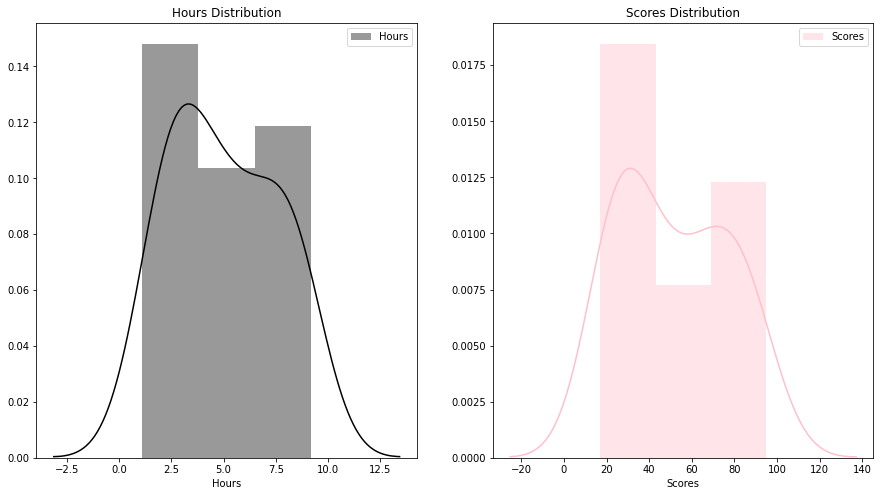

In [9]:
graph=plt.figure(figsize=(15,8))
g1=graph.add_subplot(121)
g2=graph.add_subplot(122)
g1.set_title('Hours Distribution')
g2.set_title('Scores Distribution')
p1=sns.distplot(s_data['Hours'],label='Hours',ax=g1,color='black')
p2=sns.distplot(s_data['Scores'],label='Scores',ax=g2,color='pink')
p1.legend()
p2.legend()

**Visualization of Relationships between the 2 variables:**

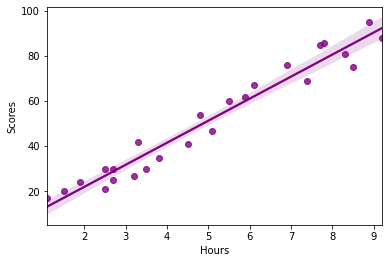

In [12]:
sns.regplot(x=s_data['Hours'],y=s_data['Scores'],color='purple')

**Seperating "attributes" (inputs) and "labels" (outputs).**

In [17]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

**Train and Test sets**

In [16]:
from sklearn.model_selection import train_test_split 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Training Model**

In [ ]:
from sklearn.linear_model import LinearRegression  

model =LinearRegression()
model.fit(X_train,y_train)
print("Training complete.")

**Making Prediction**

In [21]:
predictions1=model.predict(X_test)
predictions1

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Testing model's accuracy:**

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE1=mean_absolute_error(predictions1,y_test)
RMSE1=np.sqrt(mean_squared_error(y_test,predictions1))
print('Mean Absolute error in Linear Regressor Model :',MAE1.round(2))
print('Root Mean Squared Error in Linear Regressor Model :',RMSE1.round(2))

Mean Absolute error in Linear Regressor Model : 4.18
Root Mean Squared Error in Linear Regressor Model : 4.65


**Comparing Actual vs Predicted**

In [52]:
data1 = pd.DataFrame({'Actual' : y_test , 'Predicted' : predictions1})
data1.reset_index(drop=True,inplace=True)
data1['Predicted']=predictions1
data1['Deviation']=abs(data1['Actual']-data1['Predicted'])
data1

,Actual,Predicted,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


**Visualizing the deviation of data between the actual and predicted values by LinearRegression Model**

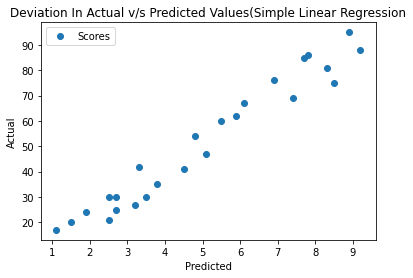

In [48]:
# Plotting the distribution of scores

s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Deviation In Actual v/s Predicted Values(Simple Linear Regression')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()

**Enter the no. of study hours to predict the result:**

In [58]:
n=float(input())
result=model.predict([[n]])
print("After studying for {} hours, The Expected Score Should be {}".format(n,result.round(2)))

9.25
After studying for 9.25 hours, The Expected Score Should be [93.69]


**Conclusion**

In this regression task we have predicted the percentage of marks that a student is expected to score based upon the number of hours they studied. This was a simple linear regression task as it involves just two variables. We have successfully deduced that if a student studies for 9.25 hours a day the his predicted scores will be 93.69%